# YouTube Channel Performance Analytics

In [228]:
import pandas as pd

# # Load the dataset
df = pd.read_csv("youtube_channel_real_performance_analytics.csv")

pd.options.display.float_format = '{:.2f}'.format


print(df.to_string())


      ID  Video Duration   Video Publish Time  Days Since Publish  Day  Month  Year Day of Week  Revenue per 1000 Views (USD)  Monetized Playbacks (Estimate)  Playback-Based CPM (USD)  CPM (USD)  Ad Impressions  Estimated AdSense Revenue (USD)  DoubleClick Revenue (USD)  YouTube Ads Revenue (USD)  Watch Page Ads Revenue (USD)  YouTube Premium (USD)  Transaction Revenue (USD)  Transactions  Revenue from Transactions (USD)  Reactions  Chat Messages Count  Reminders Set  Stream Hours  Remix Views  Remix Count  Subscribers from Posts  New Comments  Shares  Like Rate (%)  Dislikes    Likes  Unsubscribes  New Subscribers  Returned Items (USD)  Unconfirmed Commissions (USD)  Approved Commissions (USD)  Orders  Total Sales Volume (USD)  End Screen Click-Through Rate (%)  End Screen Impressions  End Screen Clicks  Teaser Click-Through Rate (%)  Teaser Impressions  Teaser Clicks  Card Click-Through Rate (%)  Card Impressions  Card Clicks  Views per Playlist Start  Playlist Views  Playlist Watch 

In [229]:
print(df.isna().sum())
print("\nDuplicates: ", df.duplicated().sum(), "\n")
print(df.isnull().sum())
df.info


ID                         0
Video Duration             0
Video Publish Time         0
Days Since Publish         0
Day                        0
                          ..
Watch Time (hours)         0
Subscribers                0
Estimated Revenue (USD)    0
Impressions                0
Video Thumbnail CTR (%)    0
Length: 70, dtype: int64

Duplicates:  0 

ID                         0
Video Duration             0
Video Publish Time         0
Days Since Publish         0
Day                        0
                          ..
Watch Time (hours)         0
Subscribers                0
Estimated Revenue (USD)    0
Impressions                0
Video Thumbnail CTR (%)    0
Length: 70, dtype: int64


<bound method DataFrame.info of       ID  Video Duration   Video Publish Time  Days Since Publish  Day  Month  \
0      0          201.00  2016-06-02 00:00:00                   0    2      6   
1      1          391.00  2016-06-10 00:00:00                   8   10      6   
2      2          133.00  2016-06-14 00:00:00                   4   14      6   
3      3           14.00  2016-06-29 00:00:00                  15   29      6   
4      4           45.00  2016-07-01 00:00:00                   2    1      7   
..   ...             ...                  ...                 ...  ...    ...   
359  359          779.00  2024-08-25 00:00:00                  10   25      8   
360  360          818.00  2024-09-01 00:00:00                   7    1      9   
361  361         2233.00  2024-09-16 00:00:00                  15   16      9   
362  362          391.00  2024-09-25 00:00:00                   9   25      9   
363  363         1875.00  2024-10-18 00:00:00                  23   18     10

In [230]:
print(df.describe(include='all'))

           ID  Video Duration   Video Publish Time  Days Since Publish    Day  \
count  364.00          364.00                  364              364.00 364.00   
unique    NaN             NaN                  357                 NaN    NaN   
top       NaN             NaN  2017-03-24 00:00:00                 NaN    NaN   
freq      NaN             NaN                    2                 NaN    NaN   
mean   181.50          664.24                  NaN                8.41  15.81   
std    105.22          330.65                  NaN               15.37   8.92   
min      0.00            9.00                  NaN                0.00   1.00   
25%     90.75          496.00                  NaN                3.00   8.00   
50%    181.50          613.00                  NaN                5.00  16.00   
75%    272.25          786.50                  NaN                9.00  23.00   
max    363.00         2311.00                  NaN              260.00  31.00   

        Month    Year Day o

In [231]:
# Adjust the display settings to show all columns
pd.set_option('display.max_columns', None)

# Print data types of all columns
print(df.dtypes)


ID                           int64
Video Duration             float64
Video Publish Time          object
Days Since Publish           int64
Day                          int64
                            ...   
Watch Time (hours)         float64
Subscribers                float64
Estimated Revenue (USD)    float64
Impressions                float64
Video Thumbnail CTR (%)    float64
Length: 70, dtype: object


In [232]:
print(df.columns.tolist())


['ID', 'Video Duration', 'Video Publish Time', 'Days Since Publish', 'Day', 'Month', 'Year', 'Day of Week', 'Revenue per 1000 Views (USD)', 'Monetized Playbacks (Estimate)', 'Playback-Based CPM (USD)', 'CPM (USD)', 'Ad Impressions', 'Estimated AdSense Revenue (USD)', 'DoubleClick Revenue (USD)', 'YouTube Ads Revenue (USD)', 'Watch Page Ads Revenue (USD)', 'YouTube\xa0Premium (USD)', 'Transaction Revenue (USD)', 'Transactions', 'Revenue from Transactions (USD)', 'Reactions', 'Chat Messages Count', 'Reminders Set', 'Stream Hours', 'Remix Views', 'Remix Count', 'Subscribers from Posts', 'New Comments', 'Shares', 'Like Rate (%)', 'Dislikes', 'Likes', 'Unsubscribes', 'New Subscribers', 'Returned Items (USD)', 'Unconfirmed Commissions (USD)', 'Approved Commissions (USD)', 'Orders', 'Total Sales Volume (USD)', 'End Screen Click-Through Rate (%)', 'End Screen Impressions', 'End Screen Clicks', 'Teaser Click-Through Rate (%)', 'Teaser Impressions', 'Teaser Clicks', 'Card Click-Through Rate (%)'

# Bar Chart: Total revenue per year

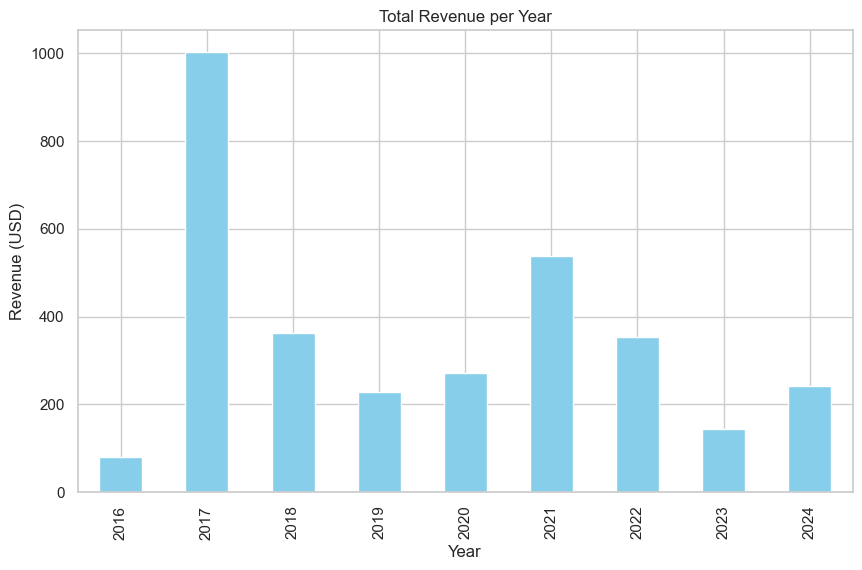

In [233]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by year and sum revenue
revenue_per_year = df.groupby('Year')['Estimated Revenue (USD)'].sum()

# Plot
revenue_per_year.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Total Revenue per Year')
plt.ylabel('Revenue (USD)')
plt.xlabel('Year')
plt.show()


# Scatter Plot: Subscribers vs Estimated Revenue (USD)

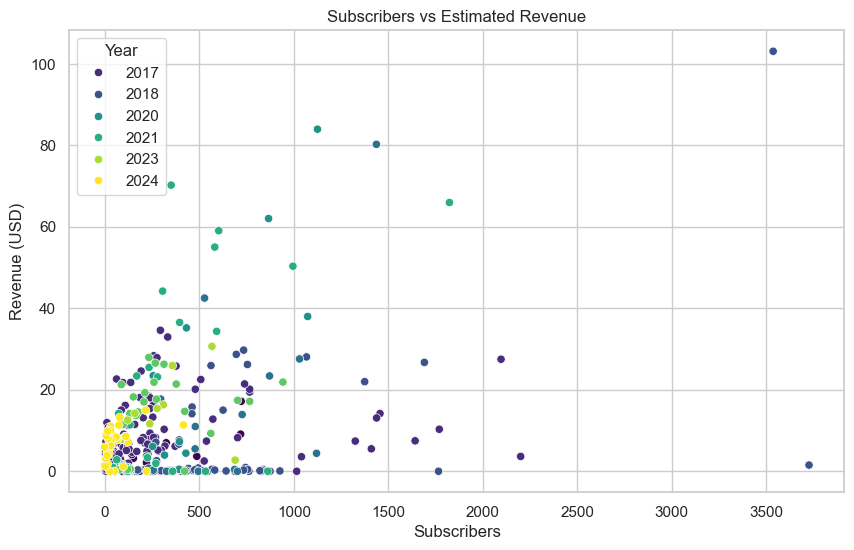

In [234]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Subscribers', y='Estimated Revenue (USD)', hue='Year', palette='viridis')
plt.title('Subscribers vs Estimated Revenue')
plt.xlabel('Subscribers')
plt.ylabel('Revenue (USD)')
plt.show()


# Line Plot: Views Over Time

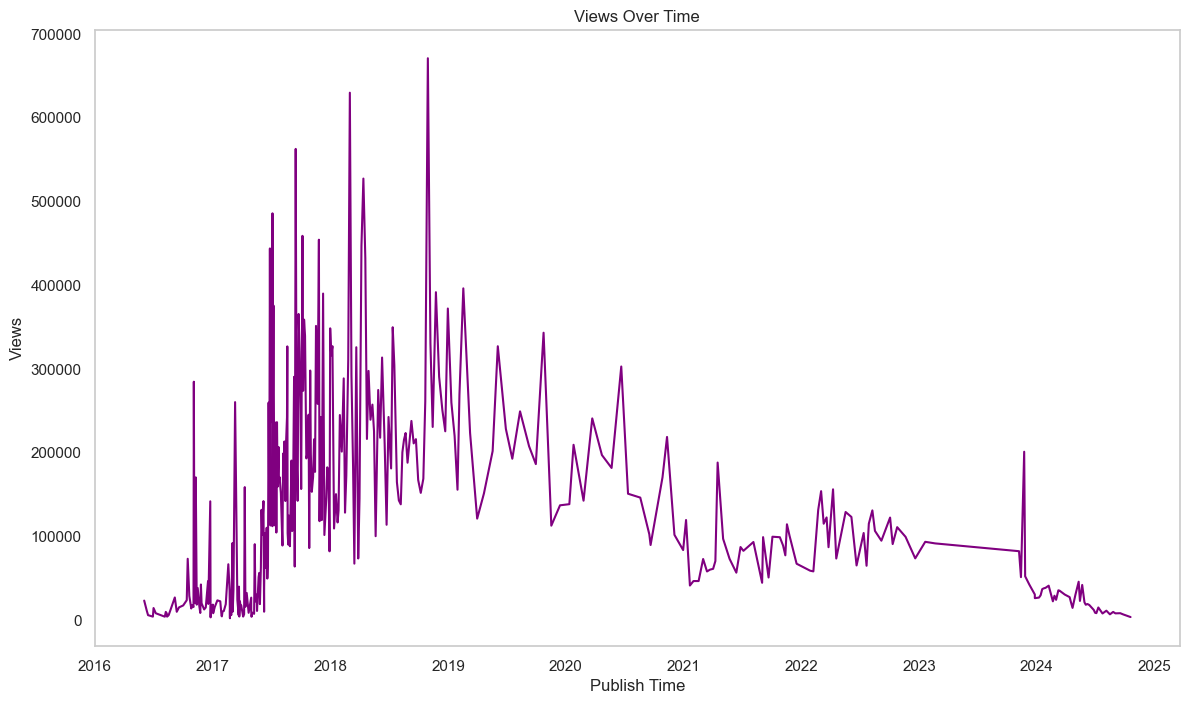

In [235]:
# Ensure Video Publish Time is datetime
df['Video Publish Time'] = pd.to_datetime(df['Video Publish Time'])

# Sort by publish time
df = df.sort_values('Video Publish Time')

# Plot
plt.figure(figsize=(14, 8))
plt.plot(df['Video Publish Time'], df['Views'], label='Views', color='purple')
plt.title('Views Over Time')
plt.xlabel('Publish Time')
plt.ylabel('Views')
plt.grid()
plt.show()


#  Histogram: Distribution of Video Thumbnail CTR (%)

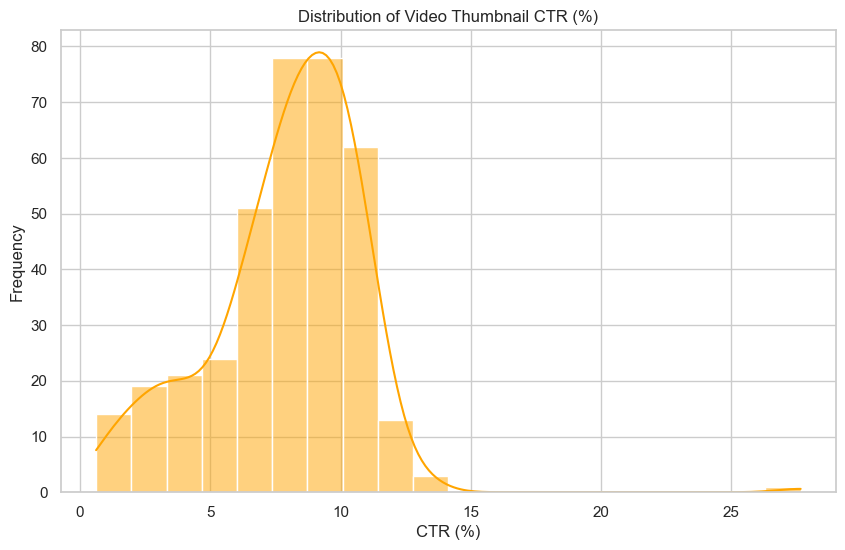

In [237]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Video Thumbnail CTR (%)'], bins=20, kde=True, color='orange')
plt.title('Distribution of Video Thumbnail CTR (%)')
plt.xlabel('CTR (%)')
plt.ylabel('Frequency')
plt.show()


# Heatmap: Correlation Between 'Watch Time (hours)', 'Subscribers', 'Estimated Revenue (USD)', 'Views', 'Impressions'

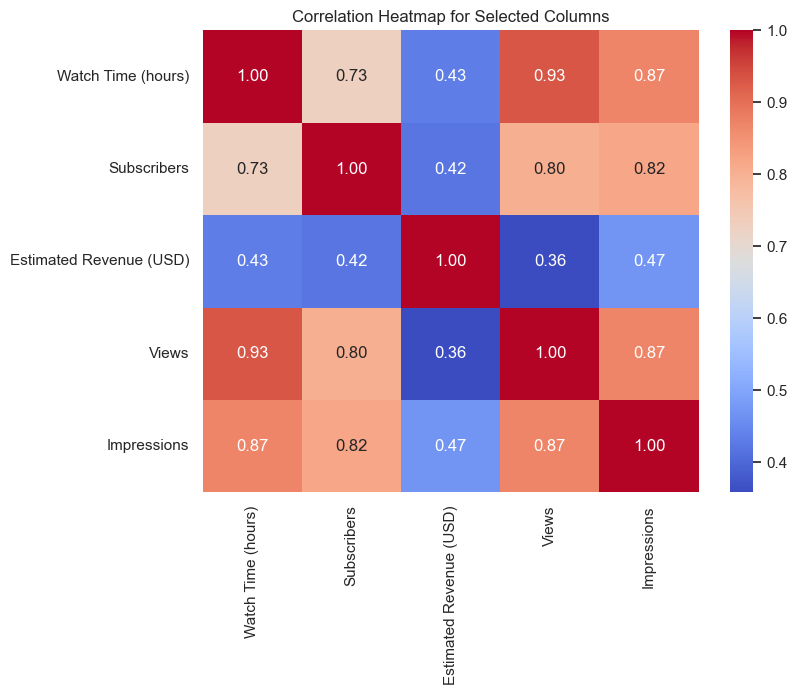

In [240]:
# Select the important columns
important_columns = df[['Watch Time (hours)', 'Subscribers', 'Estimated Revenue (USD)', 'Views', 'Impressions']]

# Calculate and plot correlation heatmap for the selected columns
plt.figure(figsize=(8, 6))
sns.heatmap(important_columns.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap for Selected Columns')
plt.show()
